# Dimensionality reduction using Principal Component Analysis(PCA)

### Modules

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA, SparsePCA, randomized_svd
from joblib import dump

# Train data

In [2]:
#Loading the training data

train_data = np.load("Data/Ferguson_fire_train.npy")
print("Data type of train array: ", train_data.dtype)
print("Shape of train data: ", train_data.shape)
print("Unique pixel values in train data: ", np.unique(train_data))

Data type of train array:  int16
Shape of train data:  (12500, 256, 256)
Unique pixel values in train data:  [0 1]


### Original train images

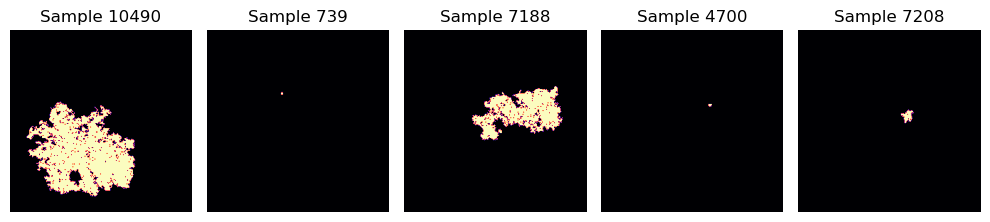

In [3]:
#Visualising random 5 images from train dataset
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))

axes = axes.ravel() 
for i in range(5):
    sample = np.random.randint(0, 12500)
    axes[i].imshow(train_data[sample], extent=[0, 10, 0, 10], cmap='magma') 
    axes[i].set_title(f"Sample {sample}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

<b> Reshaping training dataset <b/>

In [4]:
#Flattening the individual images for PCA

train_reshaped = np.reshape(train_data, (train_data.shape[0], train_data.shape[1]*train_data.shape[2]))
print(f"After reshaping: {train_reshaped.shape}")

After reshaping: (12500, 65536)


### Normal PCA

In [10]:
pca_comps = k = 250

In [11]:
start = time.time()
pca_train = PCA(n_components=pca_comps)
pca_train.fit(train_reshaped)
end = time.time()

### Sparse PCA

 Note: Execution time was too long so abandoned this.

In [20]:
# start = time.time()
# sparse_pca = SparsePCA(n_components=pca_comps)

# sparse_pca.fit(train_reshaped)
# end = time.time()
# print(end-start)

### Time taken

In [12]:
time_taken = end - start
print("Time taken(sec): ", end-start)

Time taken(sec):  272.87852358818054


### Variance

In [13]:
variance_per = np.cumsum(pca_train.explained_variance_ratio_)[-1]*100
print("Percentage variance from ", pca_comps, ": ", variance_per, "%")

Percentage variance from  250 :  94.25220023466323 %


### Saving the model using joblib

In [14]:
#Using joblib dump to save the model
dump(pca_train, 'pca_model.joblib')

['pca_model.joblib']

# Test data

In [15]:
#Loading the training data

test_data = np.load("Data/Ferguson_fire_test.npy")
print("Data type of test array: ", test_data.dtype)
print("Shape of test data: ", test_data.shape)
print("Unique pixel values in test data: ", np.unique(test_data))

Data type of test array:  int16
Shape of test data:  (5000, 256, 256)
Unique pixel values in test data:  [0 1]


### Original test images

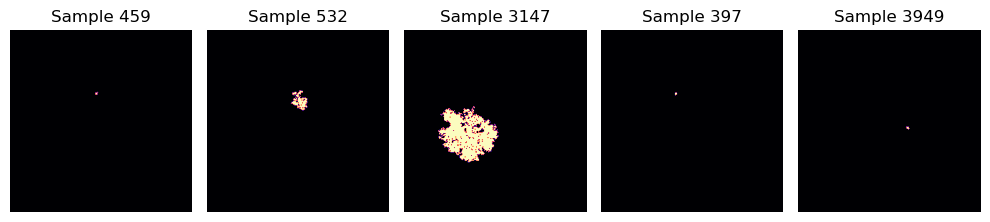

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    sample = np.random.randint(0, 5000)
    axes[i].imshow(test_data[sample], extent=[0, 10, 0, 10], cmap='magma') 
    axes[i].set_title(f"Sample {sample}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

### Flattening test data to get 2D test dataset. 

In [17]:
# Flattening individual test images for PCA

test_reshaped = np.reshape(test_data, (test_data.shape[0], test_data.shape[1]*test_data.shape[2]))
print(f"After reshaping: {test_reshaped.shape}")

After reshaping: (5000, 65536)


### Compressing test datset

In [18]:
#Using PCA model devloped using train dataset to compress test dataset

test_compressed = pca_train.transform(test_reshaped)

### Reconstructing from test dataset from latent space

In [19]:
#Reconstructing the test images from the runcation parameter k/Principal components defined

test_reconstructed = pca_train.inverse_transform(test_compressed)

### MSE loss between original test data and reconstructed test data


In [20]:
mse = mean_squared_error(test_reshaped, test_reconstructed)
print("Mean squared error: ", mse)

Mean squared error:  0.004978689848525468


### Reshaping array to create images

In [22]:
#Reshaping reconstructed flattened images to 2D images

test_reconstructed = test_reconstructed.reshape(5000, 256, 256)

### Reconstructed images

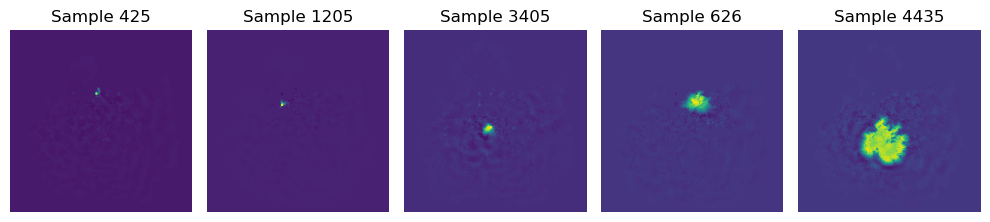

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 8))
axes = axes.ravel() 
for i in range(5):
    sample = np.random.randint(0, 5000)
    axes[i].imshow(test_reconstructed[sample], extent=[0, 10, 0, 10]) 
    axes[i].set_title(f"Sample {sample}") 
    axes[i].set_axis_off()
plt.tight_layout()
plt.show()

## Results

In [24]:
print("Truncation parameter(k): ", k)
print("Value of chosen variance: ", round(variance_per, 2), "%")
print("MSE: ", mse)
print("Execution time: ", time_taken, "seconds")

Truncation parameter(k):  250
Value of chosen variance:  94.25 %
MSE:  0.004978689848525468
Execution time:  272.87852358818054 seconds


## Analysis:

- Normal PCA with `100 components(variance ~89.00914%`) took around `255.4 seconds`. 
- PCA cannot capture non-linear relationships in the data very well.
- `Sparse PCA` with 100 components took forever to complete. So, `aborted the test after 15mins`. Considering most of the data is 0. This should have worked better.
- TruncatedPCA with `100 components(variance ~89.00914%`) took around `361.4 seconds`.
- PCA with `svd_solver='randomized'` with 100 components(variance ~74.146%) took around `673.4 seconds`.  
- For `k = 100 and k=150` components there was only a `2.3% increment` in variance. Inorder to keep the `latent space small` only first 100 components were chosen.
- Choosing high variance ~99% required large number of Principal components, which increased the latent space size. Which felt going against the purpose of compression. Hence, I choose to keep the latent space small while sacrificing accuracy. 